### Data Preprocessing


In [1]:
# Importing the necessary libraries
import pandas as pd

# Uploading the data set which was provided
data = pd.read_csv('/content/drive/MyDrive/tweet_emotions.csv')


In [2]:
# Printing the first 5 rows of the dataset
data.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [4]:
print(data.isnull().sum())

tweet_id     0
sentiment    0
content      0
dtype: int64


In [6]:
data.shape

(40000, 3)

In [7]:
# To find unnecessary characters we use regex in python
import re

def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # To remove URLs
    text = re.sub(r'@\w+', '', text)  # To remove mentions
    text = re.sub(r'#\w+', '', text)  # To remove hashtags
    text = re.sub(r'\d+', '', text)  # To remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # To remove punctuation
    text = text.lower()  # Convert to lowercase for easiness
    return text

data['cleaned_text'] = data['content'].apply(clean_text)


In [8]:
data.shape

(40000, 4)

In [9]:
data.head()

,tweet_id,sentiment,content,cleaned_text
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...,i know i was listenin to bad habit earlier a...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,layin n bed with a headache ughhhhwaitin on y...
2,1956967696,sadness,Funeral ceremony...gloomy friday...,funeral ceremonygloomy friday
3,1956967789,enthusiasm,wants to hang out with friends SOON!,wants to hang out with friends soon
4,1956968416,neutral,@dannycastillo We want to trade with someone w...,we want to trade with someone who has houston...


In [10]:
# Importing the nltk library for tokenization
from nltk.tokenize import word_tokenize
import nltk

nltk.download('punkt')

data['tokens'] = data['cleaned_text'].apply(word_tokenize) # The text is split into token


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [12]:
# Removing Stopwords
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

data['tokens'] = data['tokens'].apply(lambda tokens: [word for word in tokens if word not in stop_words])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Feature Extraction

In [13]:
# Using TFIDF method for vectorization of the text
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert tokens back to strings for vectorization
data['processed_text'] = data['tokens'].apply(lambda tokens: ' '.join(tokens))

tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(data['processed_text'])


### Model Building And Evaluation

In [14]:
data.head()

,tweet_id,sentiment,content,cleaned_text,tokens,processed_text
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...,i know i was listenin to bad habit earlier a...,"[know, listenin, bad, habit, earlier, started,...",know listenin bad habit earlier started freaki...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,layin n bed with a headache ughhhhwaitin on y...,"[layin, n, bed, headache, ughhhhwaitin, call]",layin n bed headache ughhhhwaitin call
2,1956967696,sadness,Funeral ceremony...gloomy friday...,funeral ceremonygloomy friday,"[funeral, ceremonygloomy, friday]",funeral ceremonygloomy friday
3,1956967789,enthusiasm,wants to hang out with friends SOON!,wants to hang out with friends soon,"[wants, hang, friends, soon]",wants hang friends soon
4,1956968416,neutral,@dannycastillo We want to trade with someone w...,we want to trade with someone who has houston...,"[want, trade, someone, houston, tickets, one]",want trade someone houston tickets one


In [15]:
# We need to split the data into two sets ie into a training set and a validation set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, data['sentiment'], test_size=0.2, random_state=50)


In [16]:
# Using logistic regression as our machine learning model.

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [17]:
# Evaluation of the model
from sklearn.metrics import classification_report, accuracy_score

y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.347
              precision    recall  f1-score   support

       anger       0.00      0.00      0.00        17
     boredom       0.00      0.00      0.00        30
       empty       0.14      0.01      0.01       174
  enthusiasm       0.00      0.00      0.00       153
         fun       0.23      0.02      0.03       347
   happiness       0.34      0.35      0.34      1019
        hate       0.58      0.12      0.19       259
        love       0.52      0.37      0.43       732
     neutral       0.32      0.60      0.42      1774
      relief       0.27      0.02      0.04       306
     sadness       0.34      0.25      0.29       995
    surprise       0.29      0.02      0.04       468
       worry       0.35      0.45      0.39      1726

    accuracy                           0.35      8000
   macro avg       0.26      0.17      0.17      8000
weighted avg       0.34      0.35      0.31      8000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Evaluation of model's perfomance

In [18]:
data.head()

,tweet_id,sentiment,content,cleaned_text,tokens,processed_text
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...,i know i was listenin to bad habit earlier a...,"[know, listenin, bad, habit, earlier, started,...",know listenin bad habit earlier started freaki...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,layin n bed with a headache ughhhhwaitin on y...,"[layin, n, bed, headache, ughhhhwaitin, call]",layin n bed headache ughhhhwaitin call
2,1956967696,sadness,Funeral ceremony...gloomy friday...,funeral ceremonygloomy friday,"[funeral, ceremonygloomy, friday]",funeral ceremonygloomy friday
3,1956967789,enthusiasm,wants to hang out with friends SOON!,wants to hang out with friends soon,"[wants, hang, friends, soon]",wants hang friends soon
4,1956968416,neutral,@dannycastillo We want to trade with someone w...,we want to trade with someone who has houston...,"[want, trade, someone, houston, tickets, one]",want trade someone houston tickets one


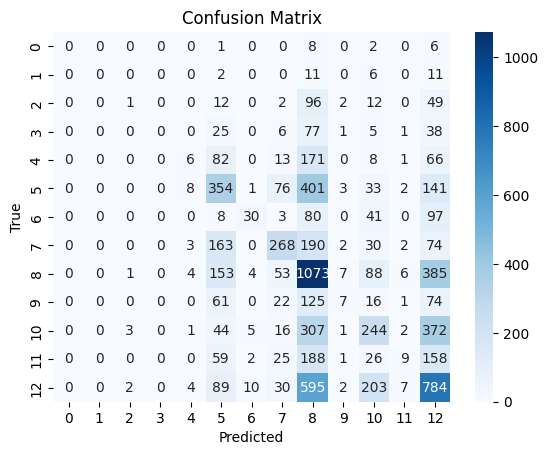

In [19]:
# The model performance can be visualised using a confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [20]:
# To evaluate the model's performance we use cross validation
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_tfidf, data['sentiment'], cv=5)
print('Cross-validation scores:', cv_scores)
print('Mean cross-validation score:', cv_scores.mean()) # Provides


Cross-validation scores: [0.2925   0.326875 0.357875 0.3615   0.316375]
Mean cross-validation score: 0.331025
